## Welcome to Week 3: Plotting!

### In weeks 2 and 3, we're going to focus on two things, which are essentially the basics of all downstream bioinformatics that you'll do.

<u>First</u>, learning to work with dataframes: we're going use the package <b>pandas</b>, which is one of the most commonly used packages for datascience. https://pandas.pydata.org/docs/getting_started/10min.html#min has a brief introduction, if you are curious.  The core idea of dataframes - the primary datatype associated with pandas - is that you have a two-dimensional matrix of data (i.e., rows and columns, like an Excel spreadsheet), and can associate a *label* with each row and column.  For example, with scRNA data, you have a 2D matrix of gene expression counts, where each row is a gene and each column is a cell. If you wanted to look up the expression for a particular gene in a particular cell, rather than have to know the particular XY "coordinates" of that datapoint (i.e., gene row # 1827 and cell column # 2937), you can just pass in the names of the gene and cell.  If you wanted to sort the dataframe by the expression of a particular gene, you'd want to make sure that the pairings of gene names, cell names, and datapoints stay correct through this sorting process, and pandas dataframes help take care of this to keep everything organized and correct.  Don't worry if this doesn't make too much sense now - it'll make more sense when we start playing with actual examples.

In addition to pandas, we're going to use the package <b>numpy</b>, which is the core "math" package ("scientific computing", as they describe it - https://docs.scipy.org/doc/numpy/user/quickstart.html and https://docs.scipy.org/doc/numpy/user/basics.html). Oftentimes when working with large datasets, you want to perform a simple operation (for example, log transform or depth normalize) on many pieces of data.  Numpy implements a lot of tricks under the hood to perform vectorized math operations very efficiently - doing the same operation to many pieces of data.  Numpy is built around *arrays*, which are a 1D datatype: essentially a list, but with a lot of added tricks. Say you have a bunch of datapoints - gene counts, for example - and want to multiply each one by 2.  Using a list, you would need to do this one-by-one for each list: iterate through the entire list with a for loop (or list comprehension) and multiply each value by two. However, using a numpy array, you can simply multiply the entire array by 2, and numpy will return the element-wise product of the array by 2 (multiplying each elementy by 2). Again, this will make a little more sense once you've played around with it a little.

**I would recommend skimming through the introductions for pandas and numpy, since you'll want to become familiar with them both for this lesson and going forward. It's not as crucial that you memorize each function and every feature, but good to just have a sense of what is possible, so that you can remember that there should be a way to do something easily, then google for it later on and re-figure out how to do it.**

* https://pandas.pydata.org/docs/getting_started/10min.html#min
* https://docs.scipy.org/doc/numpy/user/quickstart.html

The <u>second</u> thing that we're going to focus on is plotting. **Matplotlib** is the core plotting package in Python. It is built around two concepts: the figure, which is the "overall" image - think about it like a piece of paper or figure panel - and axes, which are the specific XY axes where you plot things.  The simplest example is a figure with one axis - say a simple scatter plot. This is what you'll do 90% of the time.  Sometimes, though, you might want to group together multiple plots at the same time - say you have four scatter plots you want to make together. In this case, the figure might have four axes (a 2-by-2 grid of scatter plots).  The important thing to remember, is that when you're plotting, you 1) create a figure, 2) create an axis, 3) plot things on that axis, [4) create & plot on any additional axes if applicable], and 5) save the figure (which contains the axis/axes you've plotting things on).

Two useful matplotlib links with some tutorials and example plots:

* https://matplotlib.org/tutorials/index.html
* https://matplotlib.org/gallery/index.html

Three other packages that we aren't going to use here, but you will also encounter down the road: <b>scipy</b>, which has a lot of more specialized functions for things like statistics (and many others - https://docs.scipy.org/doc/scipy/reference/, https://docs.scipy.org/doc/scipy/reference/tutorial/index.html), and **scikit-learn**, which is the core machine learning package (https://scikit-learn.org/stable/getting_started.html), and **seaborn**, which is another data visualization package (https://seaborn.pydata.org/introduction.html) built on matplotlib.

## Import Statements

#### First, let's import the packages that we are going to use today: pandas, numpy, and matplotlib.

We're going to abbreviate their names as follows:

    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    
Then, when we want to do things with numpy, for example, such as the log10() function, rather than say: numpy.log10(my_data), we can say np.log10(my_data). Note that if we wanted to just import numpy (and not rename it - so saying numpy.log10(my_data)), we would just say:

    import numpy
    
We can also import a particular function from numpy, rather than everything:

    from numpy import log10
    
If we ran that, we would be importing just the log10() function from numpy, rather than the package as a whole.  We would then access this function by saying log10(my_data), rather than np.log10(my_dat).

You can also put these things together and say:

    from matplotlib import pyplot as plt
    
Here, we're importing pyplot from the matplotlib package, and renaming it plt to save us some typing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

### 0: Import our data

#### Import two files: 'Homo_sapiens.GRCh38.gene_annotations.txt.gz' and 'deseq_endo_esc.txt.gz'.  You worked with the first file last week; the second file contains the result of differential gene expression analysis between two ENCODE samples:

HUES64 hESC https://www.encodeproject.org/experiments/ENCSR738PHQ/

HUES64 endoderm differentiation https://www.encodeproject.org/experiments/ENCSR002CTR/

The data was processed with DESeq2 to perform the differential expression testing - we'll go into this in later weeks!

In [2]:
path = '/Users/kevin/changlab/github/Bioinformatics-Tutorials/wk2_dataframes/data/'
figpath = '/Users/kevin/changlab/github/Bioinformatics-Tutorials/wk3_plotting/figures_python/'

fn_anno = 'Homo_sapiens.GRCh38.gene_annotations.txt.gz'
fn_deseq = 'deseq_endo_esc.txt.gz'

In [3]:
anno = pd.read_csv(path + fn_anno, sep=',', index_col=0)
anno.head()

,start,end,strand,length,chr,gene_symbol,gene_type,source
gene,,,,,,,,
ENSG00000000003.14,100630765,100637538,-1,6773,X,TSPAN6,protein_coding,cdna
ENSG00000000005.5,100589213,100598708,1,9495,X,TNMD,protein_coding,cdna
ENSG00000000419.12,50935098,50956428,-1,21329,20,DPM1,protein_coding,cdna
ENSG00000000457.13,169853881,169893003,-1,39121,1,SCYL3,protein_coding,cdna
ENSG00000000460.16,169780373,169834072,1,53699,1,C1orf112,protein_coding,cdna


In [4]:
deseq = pd.read_csv(path + fn_deseq, sep='\t', index_col=0)
deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351


### ***Important! - a note on pseudocounts***

**Note that when you're performing a log2 transformation, or in many cases division as well, you need add a small *pseudocount* (e.g. .01) to the column prior to taking the log2: this is because if a gene has 0 counts, you won't be able to do a log transformation (becasue log of 0 is undefined).**  If you don't do this, you'll get an error message but things will probably work.  However, if you look closesly at the resulting dataframe, you'll see that you've introduced a lot of nan values, which are essentially null values that get ignored - so if you don't include the pseudocount prior to doing calculations where trying to perform the calculation on a value of 0 will return undefined - such as log transforming and division - then you'll be artifically dropping/ignoring data.

There is a lot of flexibility in choosing a pseudocount, but also some nuance: you don't want the value to be too large, because then it will start affecting your actual data: i.e., if most of your data is in the range of 0-10, and you add a pseudocount of 10, then you'll have blown out a lot of the signal in your data.  However, if you add a pseudocount of 10**-10, then after you log transform your data, your pseudocount values (things that were 0 before) will be so far from your actual data that it will be annoying to deal with.  Instead, go with something that is roughly an order of magnitude smaller than the smallest non-zero datapoint - like .1.

### 1. Let's explore the *counts* values: these are the number of reads that align to each gene, averaged across samples.  Make a scatter plot plotting the count values for ESCs on the x axis, and ENDO on the y axis.  Make the plot using *linear* count values, as well as *log10 transformed counts*.  Label your axes appropriately.

Explore with different axes limits (i.e., the range that is shown on the plot) and submit the version containing the limits you think are most useful.  When you create the log10 transformed counts, make sure that you add a pseudocount of .1!

I've provided code for this, along with comments, to get you started. I've done two examples of this - one with just a basic figure, and then one with a few other things added, so you can get a sense of what you can change.  Try playing around with things on your own!

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html has notes for the scatter function, and https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py has a good overview - particularly the 'Parts of Figure' section.

We're using the .savefig() function to save the resulting figures.  We're providing a few optional arguments: dpi=300, to set the resolution of the output to 300 dots per inch, and bbox_inches='tight', which is saying to not to save the figure with any extra whitespace (just around the edges of the figure/axis labels).

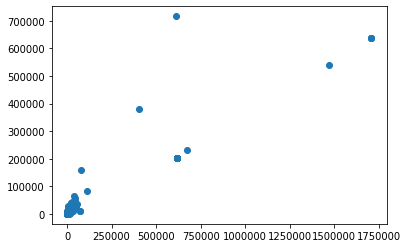

In [5]:
# version 1: basics, linear scale

# create our figure and axis
fig = plt.figure()
ax = fig.add_subplot()

# get our values from the deseq dataframe
xvals = deseq['esc_counts']
yvals = deseq['endo_counts']

# plot things
ax.scatter(xvals, yvals)

# save the output
fig.savefig(figpath + '1.1_scatter_counts_linear.png', dpi=300, bbox_inches='tight')

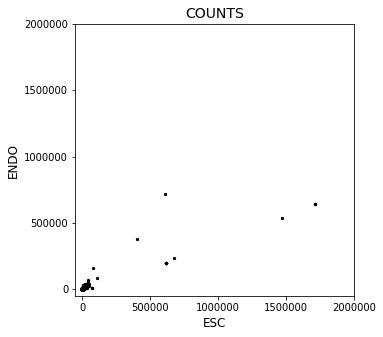

In [6]:
# version 2: changing some things, linear scale

# create our figure and axis
# make our figure dimensions 5 by 5 (i.e., make it square)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

# get our values from the deseq dataframe
xvals = deseq['esc_counts']
yvals = deseq['endo_counts']

# plot things
ax.scatter(xvals, yvals, s=5, c='k')

# label our axes
ax.set_xlabel('ESC', size=12)
ax.set_ylabel('ENDO', size=12)
ax.set_title('COUNTS', size=14)

# change our axis limits
ax_limit = 2000000
ax.set_xlim([-50000, ax_limit])
ax.set_ylim([-50000, ax_limit])

# change the ticks
ticks = np.arange(0, ax_limit+1, 500000)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# fig.tight_layout()

# save the output
fig.savefig(figpath + '1.2_scatter_counts_linear_adj.png', dpi=300, bbox_inches='tight')

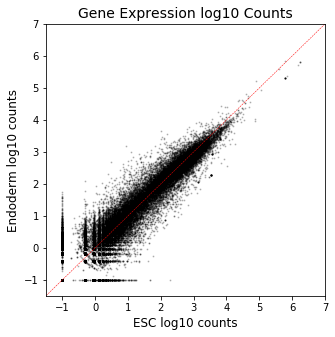

In [7]:
# version 3: changing some things, plotting on a log scale scale

# create our figure and axis
# make our figure dimensions 5 by 5 (i.e., make it square)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

# get our values from the deseq dataframe
xvals = deseq['esc_counts']
yvals = deseq['endo_counts']

# log transform
xvals = np.log10(xvals + .1)
yvals = np.log10(yvals + .1)

# plot things
ax.scatter(xvals, yvals, s=1, c='k', alpha=.2)

# add a dashed line along x = y
ax.plot([-3, 8], [-3, 8], ls='--', color='red', lw=.5)

# label our axes
ax.set_xlabel('ESC log10 counts', size=12)
ax.set_ylabel('Endoderm log10 counts', size=12)
ax.set_title('Gene Expression log10 Counts', size=14)

# change our axis limits
ax.set_xlim([-1.5, 7])
ax.set_ylim([-1.5, 7])

# change the ticks
ticks = np.arange(-1, 7.1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# save the output
fig.savefig(figpath + '1.3_scatter_counts_log.png', dpi=300, bbox_inches='tight')

#### Which of these representations do you think is more useful/informative? Log vs linear counts? Why?

### 2.  Make a histogram of gene counts for the ESC sample.  Again, plot this using both a linear and log scale.  Additionally, make a version plotted on a log scale that only includes non-zero values. Which is more informative? What do these plots tell you about the distribution of gene expression values? Are they linearly distributed? 

You'll want to explore different *bin* paramters: telling the function how many bins to use for the histogram, and how big each bin should be.  An easy way to make bins is using the np.linspace() and/or np.logspace() functions, which you can then pass into the ax.hist() function as the bins argument.

1708852.45608479
0.0


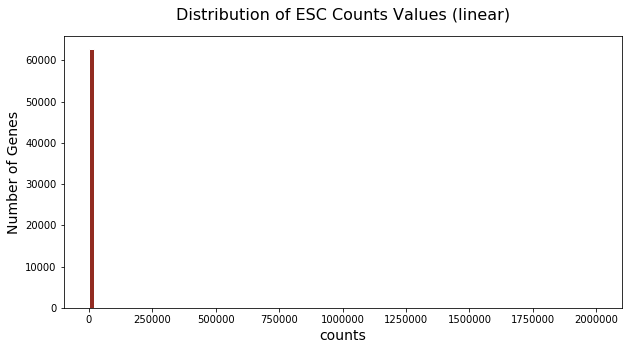

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

vals = deseq['esc_counts']
print(vals.max())
print(vals.min())

ax.hist(vals, bins=np.linspace(0, 2000000, 100), color='#922B21', edgecolor='w', lw=1)

ax.set_xlabel('counts', size=14)
ax.set_ylabel('Number of Genes', size=14)
ax.set_title('Distribution of ESC Counts Values (linear)', size=16, y=1.04)

fig.savefig(figpath + '2.1_hist_counts.png', dpi=300, bbox_inches='tight')

1708852.55608479
0.1


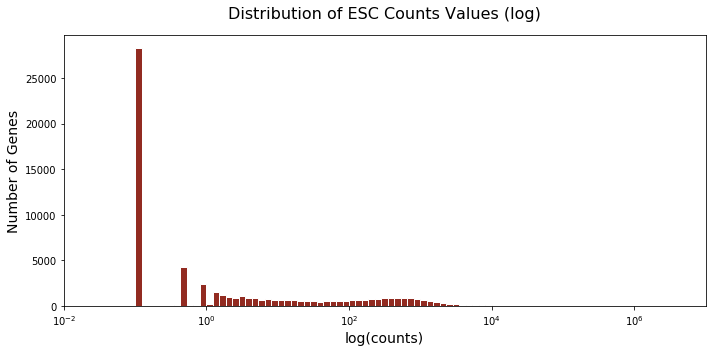

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

vals = deseq['esc_counts'] + .1
print(vals.max())
print(vals.min())

ax.hist(vals, bins=np.logspace(-2, 7, 100), color='#922B21', edgecolor='w', lw=1)

ax.set_xlabel('log(counts)', size=14)
ax.set_ylabel('Number of Genes', size=14)
ax.set_title('Distribution of ESC Counts Values (log)', size=16, y=1.04)

ax.set_xscale('log')
ax.set_xlim([.01, 10**7])

fig.tight_layout()
plt.show()

fig.savefig(figpath + '2.2_hist_logcounts.png', dpi=300, bbox_inches='tight')

1708852.45608479
0.07977712439472334


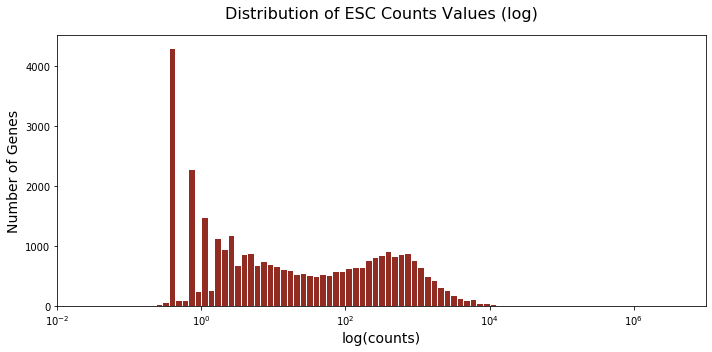

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

vals = deseq['esc_counts']
vals = vals[vals > 0]
print(vals.max())
print(vals.min())

ax.hist(vals, bins=np.logspace(-2, 7, 100), color='#922B21', edgecolor='w', lw=1)

ax.set_xlabel('log(counts)', size=14)
ax.set_ylabel('Number of Genes', size=14)
ax.set_title('Distribution of ESC Counts Values (log)', size=16, y=1.04)

ax.set_xscale('log')
ax.set_xlim([.01, 10**7])

fig.tight_layout()
plt.show()

fig.savefig(figpath + '2.3_hist_logcounts_nonzero.png', dpi=300, bbox_inches='tight')

### 3.  Make a histogram comparing the distribution of log gene counts for each of the two samples.

Overlay these on the same axis.  You may want to look at the histtype argument, as well as the alpha parameters, and explore which ones you think best display the data. Also include a legend using the ax.legend() command, and label your axes appropriately.

In addition, there's a lot of genes that are zero in both samples: when you plot your histogram, only show genes that have nonzero counts in at least one of the samples (i.e., don't include genes that are zero in both samples).

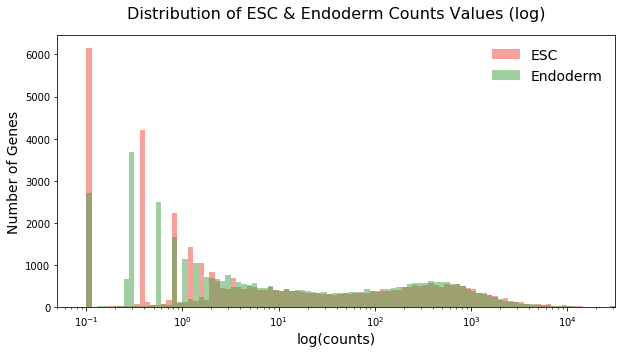

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

v1 = deseq['esc_counts']
v2 = deseq['endo_counts']

m1 = v1 > 0
m2 = v2 > 0
mask = m1 | m2

v1 = v1[mask]
v2 = v2[mask]

v1 = np.clip(v1, .1, 10**4.5)
v2 = np.clip(v2, .1, 10**4.5)

bins = np.logspace(-1, 4.5, 100)

ax.hist(v1, bins=bins, color='#F44336', histtype='stepfilled', alpha=.5)
ax.hist(v2, bins=bins, color='#43A047', histtype='stepfilled', alpha=.5)

ax.legend(['ESC','Endoderm'], frameon=False, fontsize=14)

ax.set_xlabel('log(counts)', size=14)
ax.set_ylabel('Number of Genes', size=14)
ax.set_title('Distribution of ESC & Endoderm Counts Values (log)', size=16, y=1.04)

ax.set_xscale('log')
ax.set_xlim([.05, 10**4.5])

plt.show()

fig.savefig(figpath + '3_hist_overlay_log2counts.png', dpi=300, bbox_inches='tight')

### 4.  MA plot

A very common type of plot is a 'MA' plot: in this plot, you plot log mean abudance (baseMean) on the x axis versus log2FC on the y axis.  In this way, you can get a global sense of what the differences between two samples look like.

Make a MA plot for the two samples, and also plot a line along the y=0.

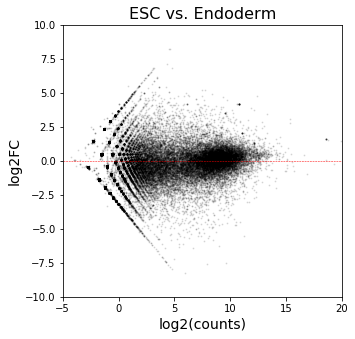

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

x = deseq['baseMean']
x = np.log2(x + .01)
y = deseq['log2FoldChange']

ax.scatter(x, y, s=1, c='k', alpha=.1)
ax.plot([-5, 20],[0,0],'r--', lw=.5)

ax.set_xlabel('log2(counts)', size=14)
ax.set_ylabel('log2FC', size=14)
ax.set_title('ESC vs. Endoderm', size=16)

ax.set_ylim([-10, 10])
ax.set_xlim([-5, 20])

fig.savefig(figpath + '4.1_MA.png', dpi=300, bbox_inches='tight')

In this case, you're able to use the output from DESeq2 which has already computed the mean and log2FC between your samples.  However, it's good to be able to do this on your own as well. Create three new columns in your dataframe:

* **own_mean**: the mean of esc_counts and endo_counts
* **own_fc**: the fold change of esc_counts over endo_counts.  When you do this, add a pseudocount of .01 to each column (esc_counts and endo_counts) prior to dividing them.  So you are doing (esc_counts + .1) / (endo_counts + .1).
* **own_log2fc**: the log2 of the own_fc column

Now, remake the MA plot using the columns you created. Does it look the same?

Play around with the pseudocount value that you add, and see how it changes things and compress your data if too large.

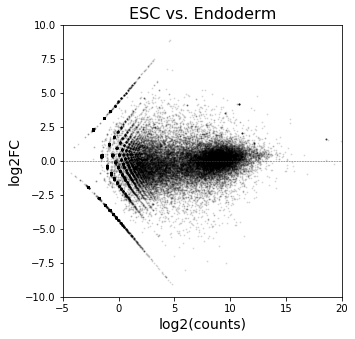

In [13]:
pseudocount = .1

deseq['own_mean'] = deseq[['esc_counts','endo_counts']].mean(axis=1)
deseq['own_fc'] = (deseq['esc_counts'] + pseudocount) / (deseq['endo_counts'] + pseudocount)
deseq['own_log2fc'] = np.log2(deseq['own_fc'])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

x = deseq['own_mean']
x = np.log2(x + .01)
y = deseq['own_log2fc']

ax.scatter(x, y, s=1, c='k', alpha=.1)
ax.plot([-5, 20],[0,0],'r--', lw=.5)

ax.set_xlabel('log2(counts)', size=14)
ax.set_ylabel('log2FC', size=14)
ax.set_title('ESC vs. Endoderm', size=16)

ax.set_ylim([-10, 10])
ax.set_xlim([-5, 20])

fig.savefig(figpath + '4.2_MA-own-calculations.png', dpi=300, bbox_inches='tight')

Optional - for an added challenge, make a MA plot where the color of each point is indicated by the adjusted p value, and include a colorbar for the p value.

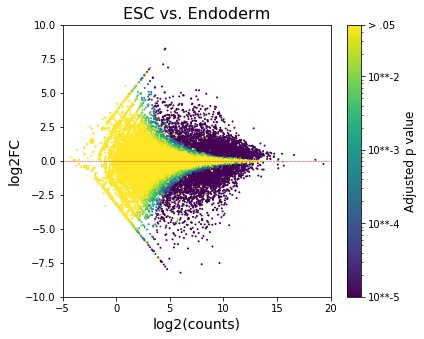

In [14]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot()

x = deseq['baseMean']
x = np.log2(x + .01)
y = deseq['log2FoldChange']
z = deseq['padj']
z[z.isnull()] = 1

# z = np.clip(z, 10**-5, .05)

normax = mpl.colors.LogNorm(vmin=10**-5, vmax=.05)
cax = ax.scatter(x, y, s=1, c=z, norm=normax, alpha=1, cmap='viridis')
ax.plot([-5, 20],[0,0],'r--', lw=.5)

ax.set_xlabel('log2(counts)', size=14)
ax.set_ylabel('log2FC', size=14)
ax.set_title('ESC vs. Endoderm', size=16)

ax.set_ylim([-10, 10])
ax.set_xlim([-5, 20])

cbar = plt.colorbar(cax, ticks=[10**-5, 10**-4, 10**-3, 10**-2, .05])
cbar.set_ticklabels(['10**-5', '10**-4','10**-3','10**-2','> .05'])
cbar = cbar.set_label('Adjusted p value', size=12)

fig.savefig(figpath + '4.3_MA-with-pval.png', dpi=300, bbox_inches='tight')

### 5.  Volcano Plot

This is another very common way of visualizing the significance of gene expression changes between two samples.  On the x axis, we plot log2FC.  On the y-axis, we plot -log10(adjusted pvalue).  We log transform the value for the same reason we log transform gene expression data (the range is too large to visualize on a linear scale), and take the negative of this value because we want high pvalues, i.e. 1, to be at the bottom, and low pvalues, i.e. close to 0, to be at the top.

Include lines showing a cutoff of log2FC > 1, and pvalue < .05.

Before you plot this - what is the minimum adjusted p value in your dataframe?  A pvalue or adjusted p value of 0 generally indicates that the value was sufficiently small that because of a rounding error, it is stored at 0.

For the genes for which the padj is equal to 0, set it equal to the smallest *nonzero* pvalue.

Additionally, for columns where no padj is reported, set the value equal to 1.

In [15]:
print(deseq['padj'].min())

0.0


In [16]:
mask = deseq['padj'] != 0
print(deseq.loc[mask, 'padj'].min())

deseq.loc[~mask, 'padj'] = deseq.loc[mask, 'padj'].min()

deseq.loc[deseq['padj'].isnull(), 'padj'] = 1

1.6827050383452681e-298


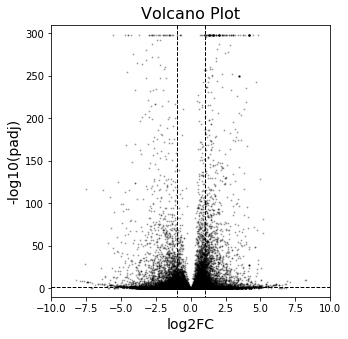

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

x = deseq['log2FoldChange']
y = deseq['padj']
y = -np.log10(y)

ax.scatter(x,y, s=1, c='k', alpha=.25)

ax.plot([1, 1],[-50, 400], 'k--', lw=1)
ax.plot([-1, -1],[-50, 400], 'k--', lw=1)
ax.plot([-10, 10],[-np.log10(.05), -np.log10(.05)],  'k--', lw=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 310])

ax.set_xlabel('log2FC', size=14)
ax.set_ylabel('-log10(padj)', size=14)
ax.set_title('Volcano Plot', size=16)

fig.savefig(figpath + '5.1_volcano.png', format='png', dpi=300, bbox_inches='tight')

The data says that they sorted Endoderm based on CD184 positive cells.  On your volcano plot, highlight the point corresponding to CD184.  Note, you may need to look up the correct gene name in your index - particularly with CD genes, there's often a corresponding gene name.  e.g., CD45 is PTPRC.  You may also need to find out the ENSG ID by looking it up in the annotation dataframe.

ENSG00000121966.6


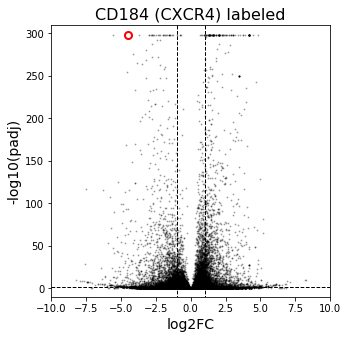

In [18]:
gene = 'CXCR4'
ix = anno.loc[anno['gene_symbol'] == gene].index[0]

print(ix)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

x = deseq['log2FoldChange']
y = deseq['padj']
y = -np.log10(y)

ax.scatter(x,y, s=1, c='k', alpha=.25)
ax.scatter(x.loc[ix], y.loc[ix], s=50, c='w', alpha=1, edgecolor='r', lw=2)

ax.plot([1, 1],[-50, 400], 'k--', lw=1)
ax.plot([-1, -1],[-50, 400], 'k--', lw=1)
ax.plot([-10, 10],[-np.log10(.05), -np.log10(.05)],  'k--', lw=1)

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 310])

ax.set_xlabel('log2FC', size=14)
ax.set_ylabel('-log10(padj)', size=14)
ax.set_title('CD184 (CXCR4) labeled', size=16)

plt.show()

fig.savefig(figpath + '5.2_volcano_labeled.png', format='png', dpi=300, bbox_inches='tight')

### 6.  Bar plot of the number of genes per chromosome

Make a plot showing the number of genes expressed on each chromosome (only 1-22, X, Y). Order the x axis from 1-22, X, Y.

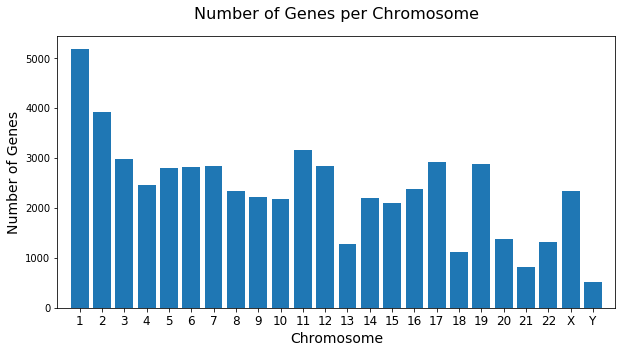

In [19]:
from collections import Counter

chr_counts = Counter(anno['chr'])

chrs = [str(i) for i in range(1, 23)] + ['X','Y']
yvals = [chr_counts[i] for i in chrs]
xvals = np.arange(len(yvals))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(xvals, yvals)

ax.set_xticks(xvals)
ax.set_xticklabels(chrs, size=12)

ax.set_xlabel('Chromosome', size=14)
ax.set_ylabel('Number of Genes', size=14)
ax.set_title('Number of Genes per Chromosome', size=16, y=1.04)

ax.set_xlim([-1, 24])

fig.savefig(figpath + '6_bar_genes-per-chromosome.png',dpi=300, bbox_inches='tight')

### 7.  Box plot of non-zero gene expression values in ES cells, grouped by chromosome.

1.  Compute TPM values from the counts values for the ESC_counts.  Do this by 1) taking the counts, divided by the average length; 2) dividing this by the sum of the length-normalized counts, and 3) multiplying by 1,000,000.  This reults in the transcripts per million, which is the counts, normalized by length, normalized by sequencing depth.  Add this as a new column to your dataframe.

2.  Make a list of chromosomes.  Make a second empty list.  Iterate through the chromosomes, get only the genes that are on that chromosome.  And then get the associated tpm values.  Note that you'll need to use the annotation and deseq dataframes for this.

3.  Make the box plot.

In [20]:
esc_counts = deseq['esc_counts']
norm_length = esc_counts / deseq['avg_length']
norm_length_size = 1000000 * norm_length / norm_length.sum()
deseq['esc_tpm'] = norm_length_size

deseq.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,endo_counts,esc_counts,avg_length,own_mean,own_fc,own_log2fc,esc_tpm
ENSG00000000003.14,1155.378951,-0.071363,0.065942,-1.082201,2.791630e-01,4.140459e-01,1183.956122,1126.801779,2042.518601,1155.378951,0.951730,-0.071376,3.751137
ENSG00000000005.5,13.444480,3.979120,0.821682,4.842651,1.281184e-06,5.248074e-06,1.602214,25.286746,893.058748,13.444480,14.913955,3.898591,0.192528
ENSG00000000419.12,484.030001,0.560340,0.098994,5.660330,1.510826e-08,7.296088e-08,391.217628,576.842374,935.608584,484.030001,1.474358,0.560087,4.192223
ENSG00000000457.13,151.416462,-0.643948,0.180979,-3.558143,3.734859e-04,1.155851e-03,184.782827,118.050096,3450.560335,151.416462,0.639054,-0.645990,0.232626
ENSG00000000460.16,387.181972,0.771154,0.119697,6.442528,1.174994e-10,6.669104e-10,286.228331,488.135614,2122.539351,387.181972,1.705160,0.769907,1.563746


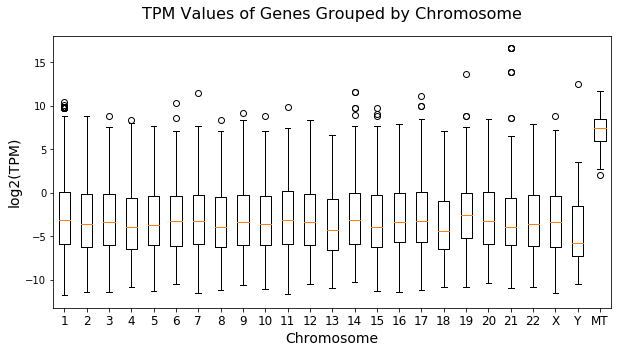

In [21]:
chrs = [str(i) for i in range(1, 23)] + ['X','Y','MT']
tpm_vals = []

for i in chrs:
    m1 = anno['chr'] == i
    m2 = deseq['esc_counts'] > 0
    mask = m1 & m2
    vals = deseq.loc[mask, 'esc_tpm']
    vals = np.log2(vals)
    tpm_vals += [vals.values]
    
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

xvals = np.arange(len(tpm_vals))

ax.boxplot(tpm_vals, positions=xvals)

ax.set_xticks(xvals)
ax.set_xticklabels(chrs, size=12)
ax.set_xlabel('Chromosome', size=14)
ax.set_ylabel('log2(TPM)', size=14)
ax.set_title('TPM Values of Genes Grouped by Chromosome', size=16, y=1.04)

plt.show()

fig.savefig(figpath + '7_boxplot_tpm-per-chromosome.png', dpi=300, bbox_inches='tight')